In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/calcofi/bottle.csv
/kaggle/input/calcofi/cast.csv


In [6]:
import numpy as np         #python deal with matirx based calculation
import pandas as pd        #build to handel working with dataset (manipulate or play around)
import seaborn as sns      #data visulization used to create graphs 
import matplotlib.pyplot as plt #data visulization technique used to create graphs#
#difference between seaborn and matplotlib.pyplot
##an-> seaborn--point to point(easily) & matplotlib is quiet completed like flying fighter jet(multiple features and compatibility)
##pyplot--> is the submodule of library(matplotlib)[deal with python based interfaces](helps work with python)
from sklearn import preprocessing, svm#sklearn give abilities to deal with machine learning problem
#preprocessing--> process the dataset(delete,wrongdata,unclean data)
#svm --> another algo in ML 
from sklearn.model_selection import train_test_split #selecting a particular module form sklearn-->model_slection-->importing a fuctionality(train_test_split)
from sklearn.linear_model import LinearRegression # same as upper
#tarin_test_split--> train the data and split the data

In [7]:
df=pd.read_csv("/kaggle/input/calcofi/bottle.csv")

/tmp/ipykernel_33/2069962896.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/kaggle/input/calcofi/bottle.csv")


In [8]:
df


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.500,33.4400,NaN,25.64900,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.460,33.4400,NaN,25.65600,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.460,33.4370,NaN,25.65400,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.450,33.4200,NaN,25.64300,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.450,33.4210,NaN,25.64300,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,864859,093.4 026.4,20-1611SR-MX-310-2239-09340264-0000A-7,0,18.744,33.4083,5.805,23.87055,108.74,...,0.18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864859,34404,864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,2,18.744,33.4083,5.805,23.87072,108.74,...,0.18,2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864860,34404,864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,5,18.692,33.4150,5.796,23.88911,108.46,...,0.18,5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864861,34404,864862,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3,10,18.161,33.4062,5.816,24.01426,107.74,...,0.31,10,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#take out two columns from the data-set find correlation between salinity and temp
df_bin = df[['Salnty','T_degC']]
df_bin


,Salnty,T_degC
0,33.4400,10.500
1,33.4400,10.460
2,33.4370,10.460
3,33.4200,10.450
4,33.4210,10.450
...,...,...
864858,33.4083,18.744
864859,33.4083,18.744
864860,33.4150,18.692
864861,33.4062,18.161


In [11]:
#COVERT THE CHANGE THE SELECTED COLUMN NAME FORM DATASET
df_bin.columns = ['sal' , 'temp']
df_bin

,sal,temp
0,33.4400,10.500
1,33.4400,10.460
2,33.4370,10.460
3,33.4200,10.450
4,33.4210,10.450
...,...,...
864858,33.4083,18.744
864859,33.4083,18.744
864860,33.4150,18.692
864861,33.4062,18.161


In [12]:
#print 1st 5 rows of data frame or rows you want to print
df_bin.head()   #if value not provided provide the default data


,sal,temp
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45


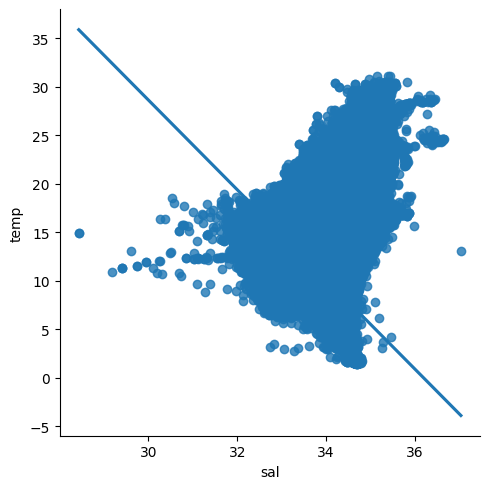

In [13]:
#scatter plot or dot plot of the data set
sns.lmplot(x="sal", y="temp",data=df_bin)

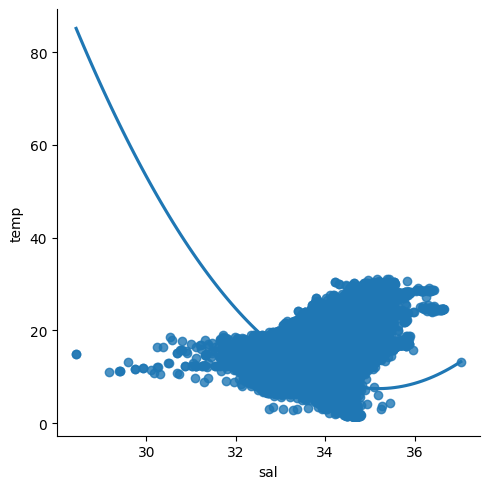

In [16]:
#for better and clear representation of data
sns.lmplot(x="sal",y="temp",data=df_bin, order=2, ci=None)

In [17]:
#cleaning of the data
df_bin.fillna(method="ffill",inplace=True)#here the data-will be copied form the previous rows of initiaL row contaning NAN VALUES,
#INPLACE=TRUE, where no new data-frame will be created and will be created,and changes will be used done in old "df_bin" 

/tmp/ipykernel_33/2377699157.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bin.fillna(method="ffill",inplace=True)#here the data-will be copied form the previous rows of initiaL row contaning NAN VALUES,
/tmp/ipykernel_33/2377699157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin.fillna(method="ffill",inplace=True)#here the data-will be copied form the previous rows of initiaL row contaning NAN VALUES,


In [26]:
                                #start creating our models
#X = np.array(df_bin['sal'])#conversion it into array--horizontal array ("column")
X = np.array(df_bin['sal']).reshape(-1,1) #to vertical array
Y = np.array(df_bin['temp']).reshape(-1,1)

#dropping of empty rows or "na" values
df_bin.dropna(inplace=True)

#training and testing of data-set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25)

#module used
model = LinearRegression() #best-model--> give us 1, least-model--> can go negative

#fitting the model with data
model.fit(X_train, Y_train)


/tmp/ipykernel_33/3414922732.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin.dropna(inplace=True)


LinearRegression()

In [28]:
print(model.score(X_train,Y_train))   #preety not good score as less than 0.85

0.20461747742065794


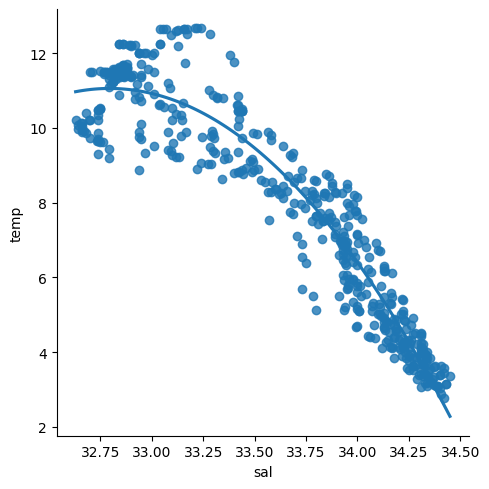

In [31]:
#as for such a large data it becomes difficult to get a good score
#creating another data frame
df_bin_500 = df_bin[:][:500] #taking first 500--> columns and rows(0:500)
sns.lmplot(x="sal",y="temp",data=df_bin_500,order=2,ci=None) #Scatter plot of the of newly created data set--> df_500


In [34]:
                                 # training the MODEL
X = np.array(df_bin_500['sal']).reshape(-1,1)
Y = np.array(df_bin_500['temp']).reshape(-1,1)        #here we converted the two parameters into vertical-array for training of df_bin_500

#deleting the "nan" vlaues from the newly generated data-set-> df_bin_500
df_bin_500.dropna(inplace=True)
    
    
    
    
            #training the new data-set df_bin_500
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25)


   #model->used            #here the same model is used for differentiation
model2 = LinearRegression()

#fitting the model2 with the data

model2.fit(X_train,Y_train)

print(model2.score(X_train,Y_train))

    
#we get a better score from the data-set value



0.8520809862535113


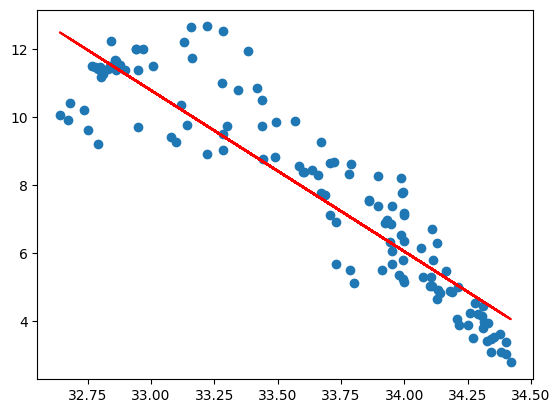

In [38]:
              #now lets see what the data-set is predicting
y_pred = model2.predict(X_test)    #(predicting y value WITH RESPECT X_test  TEMP-PREDICT
plt.scatter(X_test,Y_test)            #scatter plotting X_test and Y_test


         #plotting the line with respect Y_value
plt.plot(X_test,y_pred,color="r") 
plt.show()

**Blue-dots**--> shows the original values original values of the training data-set




,**Red-line**--> prediction that we are able to make (predicting y-value with respect to X-train)

HERE WE HAVE GOT THE TEMPERATURE WITH RESPECT TO SALINITY

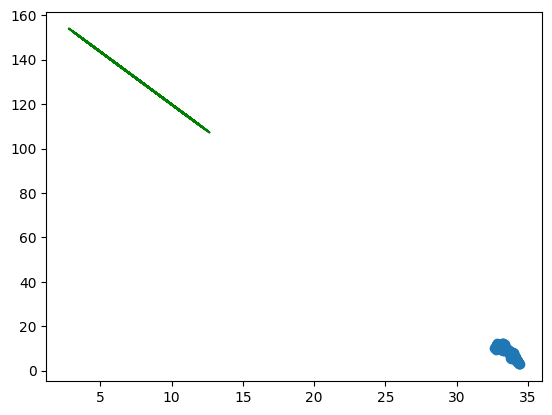

In [40]:
#NOW LETS PREDICT X-VALUE WITH RESPECT TO Y-VALUE (Prediciting Salinity WITH RESPECT TPO Temprature)

x_pred = model2.predict(Y_test)   # predicting x value with respect TO Y_TEST --> PREDICTING SALINITY
plt.scatter(X_test,Y_test)        # scatter plotting  X_TEST AND Y_TEST

    #PLOTTING---> FOR LINE
plt.plot(Y_test,x_pred,color="g")    
    
    #here the grah becomes quiet inf

predicting salinity with respect to temperature
